In [1]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt

### Linear Regression

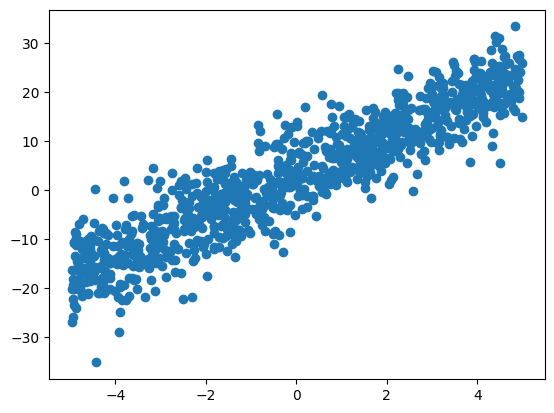

In [88]:
# Generate Random Data
n = 1000
X = 10* np.random.random(n) - 5
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 5, size = n)

plt.figure()
plt.scatter(
    X,
    Y
)


3.9980651955000837 3.1178317290960993


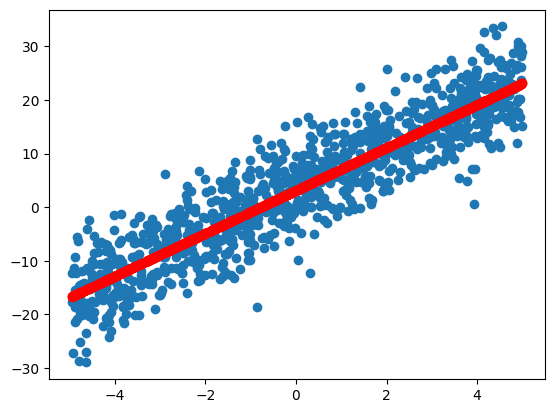

In [67]:
def Y_based_on_X(x,a,b):
  return a*x +b

# Gradient Descent
a,b = 0,0
l = 0.0015
def gd(X,Y,a,b,l):
  dlda = 0
  dldb = 0
  N = X.shape[0]
  for xi, yi in zip(X,Y):
    dlda += -2*xi*(yi - (a*xi + b))
    dldb += -2*(yi - (a*xi + b))
  a -= l*(1/N)*dlda
  b -= l*(1/N)*dldb
  return a,b

for i in range(1000):
  a,b = gd(X,Y,a,b,l)
  yhat = a*X + b
  loss = np.divide(np.sum((Y-yhat)**2,axis=0), X.shape[0])
  #print(f'loss is {loss}, a:{a}, b:{b}')
  pass

print(a,b)

plt.figure()
plt.scatter(
    X,
    Y
)

plt.scatter(X,Y_based_on_X(X,a,b),c = "red")

4.026412919780746 3.015004097590985


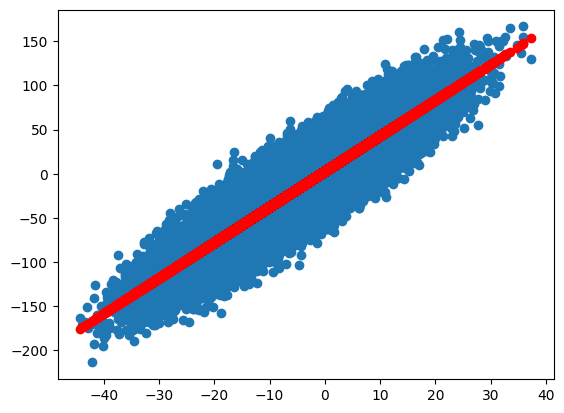

In [110]:

X = 10*np.random.randn(1000, 100) - 5
Y = 4*X + 3 + np.random.normal(loc = 0, scale = 20, size = (1000,100))

#Stochastic gradient descent
a,b = 0,0
l = 0.0015
def sgd(X,Y,a,b,l):
  N = 100
  for i in range(1000):
    dlda = 0
    dldb = 0
    for xi, yi in zip(X[i:i+99],Y[i:i+99]):
      dlda += -2*xi*(yi - (a*xi + b))
      dldb += -2*(yi - (a*xi + b))
    a -= l*(1/N)*dlda
    b -= l*(1/N)*dldb
  return a,b

for i in range(20):
  a,b = sgd(X,Y,a,b,l)
  pass

sum=0
for l in a:
  sum+=l
a = sum/len(a)
sum=0
for l in b:
  sum+=l
b= sum/len(b)

print(a,b)

plt.figure()
plt.scatter(
    X,
    Y
)

plt.scatter(X,Y_based_on_X(X,a,b),c = "red")




In [46]:
# Closed form SOlution
X_0 = []
for i in range(len(X)):
  X_0.append((1,X[i]))
X = np.matrix(X_0)
Y = np.matrix(Y)
beta = (X.T*X).I*X.T*Y.T

beta

matrix([[3.00875984],
        [4.02549153]])

As you can see the values that we get for the model are extremely close to the 3 and 4 parameters that we initially set up.

TO TRY:
1. Try varying n and see how that affects the accuracy.
2. Implement the same using GD.
3. Implement the same using SGD with m = 100 and n = 1000.